# Свертки в Keras

Будем использовать Fashion MNIST

In [ ]:
!pip install -q tensorflow==2.1

     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 450kB 50.4MB/s 
     |████████████████████████████████| 3.9MB 48.4MB/s 


In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)
import tensorflow.keras as keras
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
print("We are using Keras", keras.__version__)
import pandas as pd

Init Plugin
We're using TF 2.5.0
Init Graph Optimizer
Init Kernel
We are using Keras 2.5.0


In [2]:
# Проверяем что у нас работает GPU
tf.test.gpu_device_name()

2022-03-11 10:21:10.264912: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-11 10:21:10.265060: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


'/device:GPU:0'

Metal device set to: Apple M1


In [3]:
#GPU count and name
!nvidia-smi -L

zsh:1: command not found: nvidia-smi


# Загрузим данные

Классы:
```
0 T-shirt/top 
1 Trouser 
2 Pullover 
3 Dress 
4 Coat 
5 Sandal 
6 Shirt 
7 Sneaker 
8 Bag 
9 Ankle boot
```




In [4]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
print(x_train.shape)
print(x_val.shape)
print (y_train[:10])
print (y_val[:10])

(60000, 28, 28)
(10000, 28, 28)
[9 0 0 3 0 2 7 2 5 5]
[9 2 1 1 6 1 4 6 5 7]


Пример кусочка картинки:


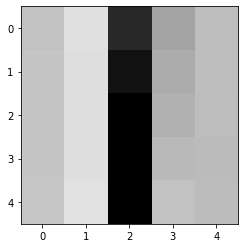

Пример картинки:


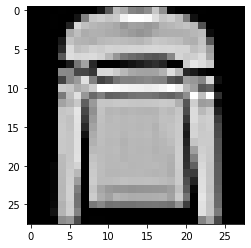

y_train [shape (60000,)] 10 примеров:
 [9 0 0 3 0 2 7 2 5 5]


In [6]:
x_train_image = np.tile(x_train[5, :, :].reshape((28, 28))[:, :, np.newaxis], (1, 1, 3))
print("Пример кусочка картинки:")
plt.imshow(x_train_image[15:20, 5:10], cmap="Greys")
plt.show()
print("Пример картинки:")
plt.imshow(x_train_image, cmap="Greys")
plt.show()
print("y_train [shape %s] 10 примеров:\n" % (str(y_train.shape)), y_train[:10])

In [7]:
# one-hot encode для ответов
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:5], y_train[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [9 0 0 3 0]


# Собираем модель

Будем как и в предыдущем модуле минимизировать кросс-энтропию.

In [8]:
# model.add(L.Conv2D(1, kernel_size=3, strides=1, padding='same', input_shape=(28, 28, 1)))

In [34]:
# temp version

K.clear_session()
model = M.Sequential()
model.add(L.Conv2D(filters=32, kernel_size=(3, 3) , strides=(1, 1), padding='valid', input_shape=(28, 28, 1)))
model.add(L.Conv2D(filters=64, kernel_size=(3, 3) , strides=(1, 1), padding='valid'))




In [35]:
(3*3*32+1)*64

18496

In [36]:
# padding='valid' -exclude non filled filter
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [47]:
# temp version

K.clear_session()
model = M.Sequential()
model.add(L.Conv2D(filters=1, kernel_size=(3, 3) , strides=(1, 1), padding='valid', input_shape=(28, 28, 1)))
model.add(L.Flatten())
model.add(L.Dense(10, activation='softmax'))


In [48]:
# padding='valid' -exclude non filled filter
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 1)         10        
_________________________________________________________________
flatten (Flatten)            (None, 676)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                6770      
Total params: 6,780
Trainable params: 6,780
Non-trainable params: 0
_________________________________________________________________


In [49]:
K.clear_session()

# в этот раз используем картинку как вход без вытягивания в вектор!

model = M.Sequential()
model.add(L.Conv2D(16, kernel_size=(3, 3) , strides=(1, 1), padding='same', input_shape=(28, 28, 1)))
model.add(L.MaxPool2D())
model.add(L.Conv2D(32, kernel_size=3, strides=1, padding='same'))
model.add(L.MaxPool2D())
model.add(L.Conv2D(64, kernel_size=3, strides=1, padding='same'))
model.add(L.MaxPool2D())
model.add(L.Flatten())
model.add(L.Dense(64, activation='elu'))
model.add(L.Dense(10, activation='softmax'))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [51]:
model.compile(
    loss='categorical_crossentropy',  # минимизируем кросс-энтропию
    optimizer='adam',  # так будет быстрее, позже узнаем что это :)
    metrics=['accuracy']  # выводим процент правильных ответов
)

In [52]:
# центрируем и нормируем, так сети будет проще учиться (позже узнаем почему :)
x_train_float = x_train.astype(np.float) / 255 - 0.5
x_val_float = x_val.astype(np.float) / 255 - 0.5

/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_12466/1114769542.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train_float = x_train.astype(np.float) / 255 - 0.5
/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_12466/1114769542.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_val_float = x_val.astype(np.f

In [55]:
# x_train_float.shape

(60000, 28, 28)

In [ ]:
#добавляем фиктивную размерность 1 в конце
# x_train_float[:, :, :, np.newaxis]


In [56]:
model.fit(
    x_train_float[:, :, :, np.newaxis], 
    y_train_oh,
    batch_size=32, 
    epochs=20,
    validation_data=(x_val_float[:, :, :, np.newaxis], y_val_oh)
)

2022-03-11 11:26:50.892464: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-11 11:26:50.895630: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-11 11:26:51.092314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
1871/1875 [============================>.] - ETA: 0s - loss: 0.4323 - accuracy: 0.8441

2022-03-11 11:27:11.926582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 23s 11ms/step - loss: 0.4322 - accuracy: 0.8441 - val_loss: 0.3298 - val_accuracy: 0.8803
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2886 - accuracy: 0.8954 - val_loss: 0.3022 - val_accuracy: 0.8875
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2467 - accuracy: 0.9074 - val_loss: 0.2672 - val_accuracy: 0.9023
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2173 - accuracy: 0.9191 - val_loss: 0.2890 - val_accuracy: 0.9005
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1941 - accuracy: 0.9281 - val_loss: 0.2691 - val_accuracy: 0.9012
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1723 - accuracy: 0.9359 - val_loss: 0.2589 - val_accuracy: 0.9068
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1536 - accuracy: 0.9422 - val_loss: 0.2666 - val_accura

In [ ]:
# https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html

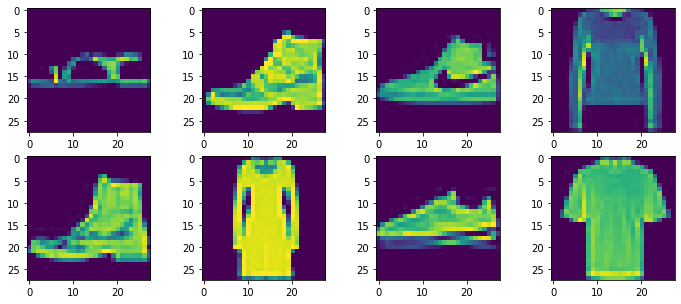

In [61]:
import matplotlib.pyplot as plt 
import random
plt.figure(figsize = (12,5))
for i in range(8):
#     ind = random.randint(0, len(X_train))
    ind = random.randint(0, 60000)
    plt.subplot(240+1+i)
    plt.imshow(x_train[ind])

In [63]:
# all categories
cates = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize = (12,7))
for i in np.arange(8):
    ind = random.randint(0,len(x_test.shape[0]))
    img = x_test[ind]
    img = img.reshape(1,28,28,1)
    img = img.astype('float32')
    img = img/255.0
    v_p = LeNet_model.predict_classes(img)
    plt.subplot(240+1+i)
    plt.imshow(x_test[ind])
    plt.title(cates[v_p[0]])

NameError: name 'x_test' is not defined

<Figure size 864x504 with 0 Axes>

In [78]:

categories ={0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

In [79]:
categories[0]

'T-shirt/top'

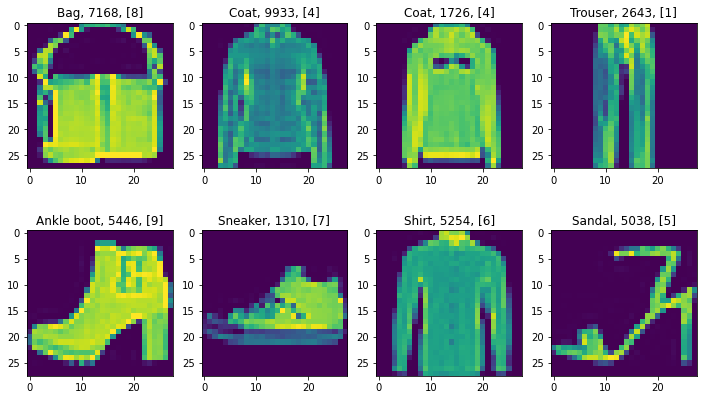

In [113]:
# all categories
cates = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize = (12,7))
for i in np.arange(8):
    ind = random.randint(0,len(x_val))
    img = x_val[ind]
    img = img.reshape(1,28,28,1)
    img = img.astype('float32')
    img = img/255.0
    v_p = model.predict_classes(img)
    vv_p = model.predict(img)
    plt.subplot(240+1+i)
#     plt.imshow(x_val[ind])
    plt.imshow(x_val[ind])
    plt.title(f'{categories[v_p[0]]}, {ind}, {v_p}' )

In [114]:
vv_p

array([[5.9190836e-22, 2.9793193e-16, 2.9251168e-28, 2.5676479e-35,
        1.2143879e-24, 1.0000000e+00, 9.7378306e-37, 6.3044209e-21,
        0.0000000e+00, 9.6009931e-29]], dtype=float32)

In [90]:
x_val[30]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          6,   0,   0,   0,   0,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          0,  25,  95,  89,   0,   0,   2,   1,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
        144, 214, 174, 179, 209,  83,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,   0, 144,
        184,   0,   0,   0,  46, 205,  62,   0,   4,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  65, 200,
          0,   0,   0,   0,   0,  64, 173,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  11,   0, 140,  86,
          0,   2,   0,   0,   0,   0, 160,  52,   0,   4,   0,   0,   0,
          0,   0],
       [  

In [96]:
img[:,0,:,:]

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]], dtype=float32)

In [100]:
a = np.array([[1,2],[3,4]])

In [105]:
a.reshape(2,2,1)

array([[[1],
        [2]],

       [[3],
        [4]]])